In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from glob import glob

In [51]:
def set_plot_params(title, ylabel):
    plt.title(title)
    plt.ylabel(ylabel, fontsize=8)
    plt.xlabel("Date", fontsize=8)
    plt.yticks(fontsize=8)
    plt.xticks(rotation=30, fontsize=8)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))


def calculate_ylim(data):
    ylim_min = min(data) - (max(data) - min(data)) * 0.1
    ylim_max = max(data) + (max(data) - min(data)) * 0.1
    return ylim_min, ylim_max


def draw_graph(data: pd.DataFrame, title: str, satillite: str, ylabel: str, date_lst: list, color="blue"):
    '''
    :param data: 시간 인덱스와 그래프로 표시할 정보가 있는 데이터프레임
    :param title: 그래프 제목
    :param ylabel: 그래프 y축 단위
    :param date_lst: 아웃라이어 날짜인덱스 리스트
    :param color: 그래프 색깔
    :return: 
    '''
    plt.figure(figsize=(13, 2), dpi=400)
    plt.plot(df_1, color=color, linestyle='--')
    for date in date_lst:
        plt.axvline(pd.to_datetime(date), color='red', linewidth=0.8, linestyle='--', label='Highlight Date')
    set_plot_params(title, ylabel)
    ylim_min, ylim_max = calculate_ylim(list(data.values))
    plt.ylim(ylim_min, ylim_max)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    # plt.show()

    plt.savefig(f'File/images/{satillite}_{title}.png', bbox_inches='tight')
    plt.close()

Database\25544.csv


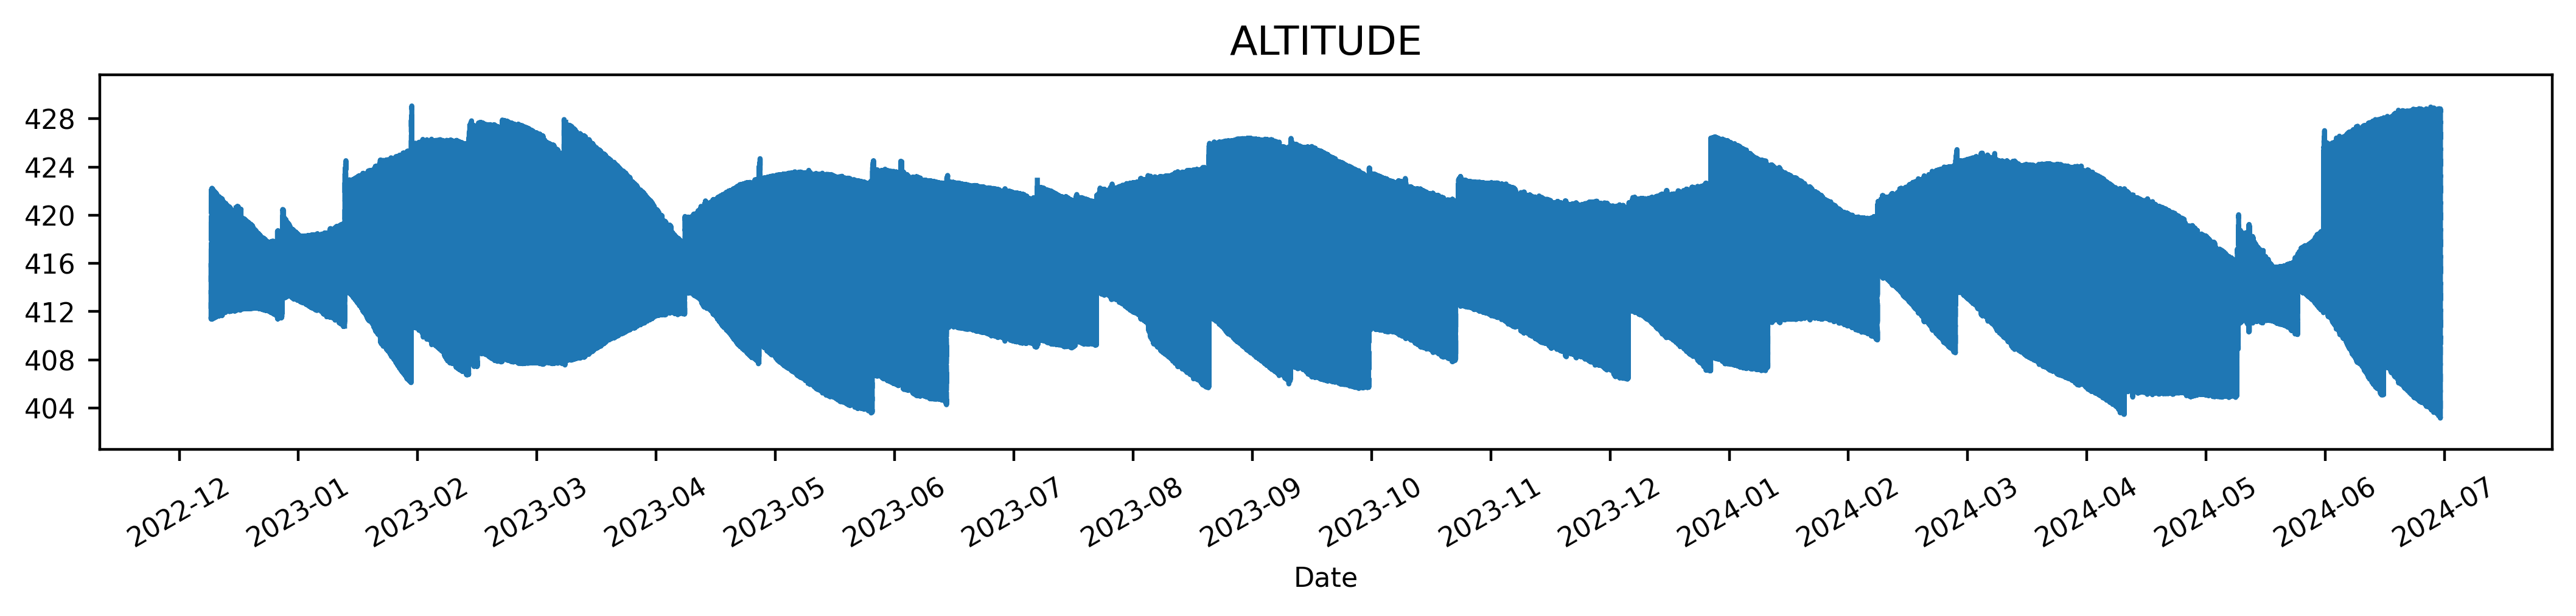

Database\25544.csv


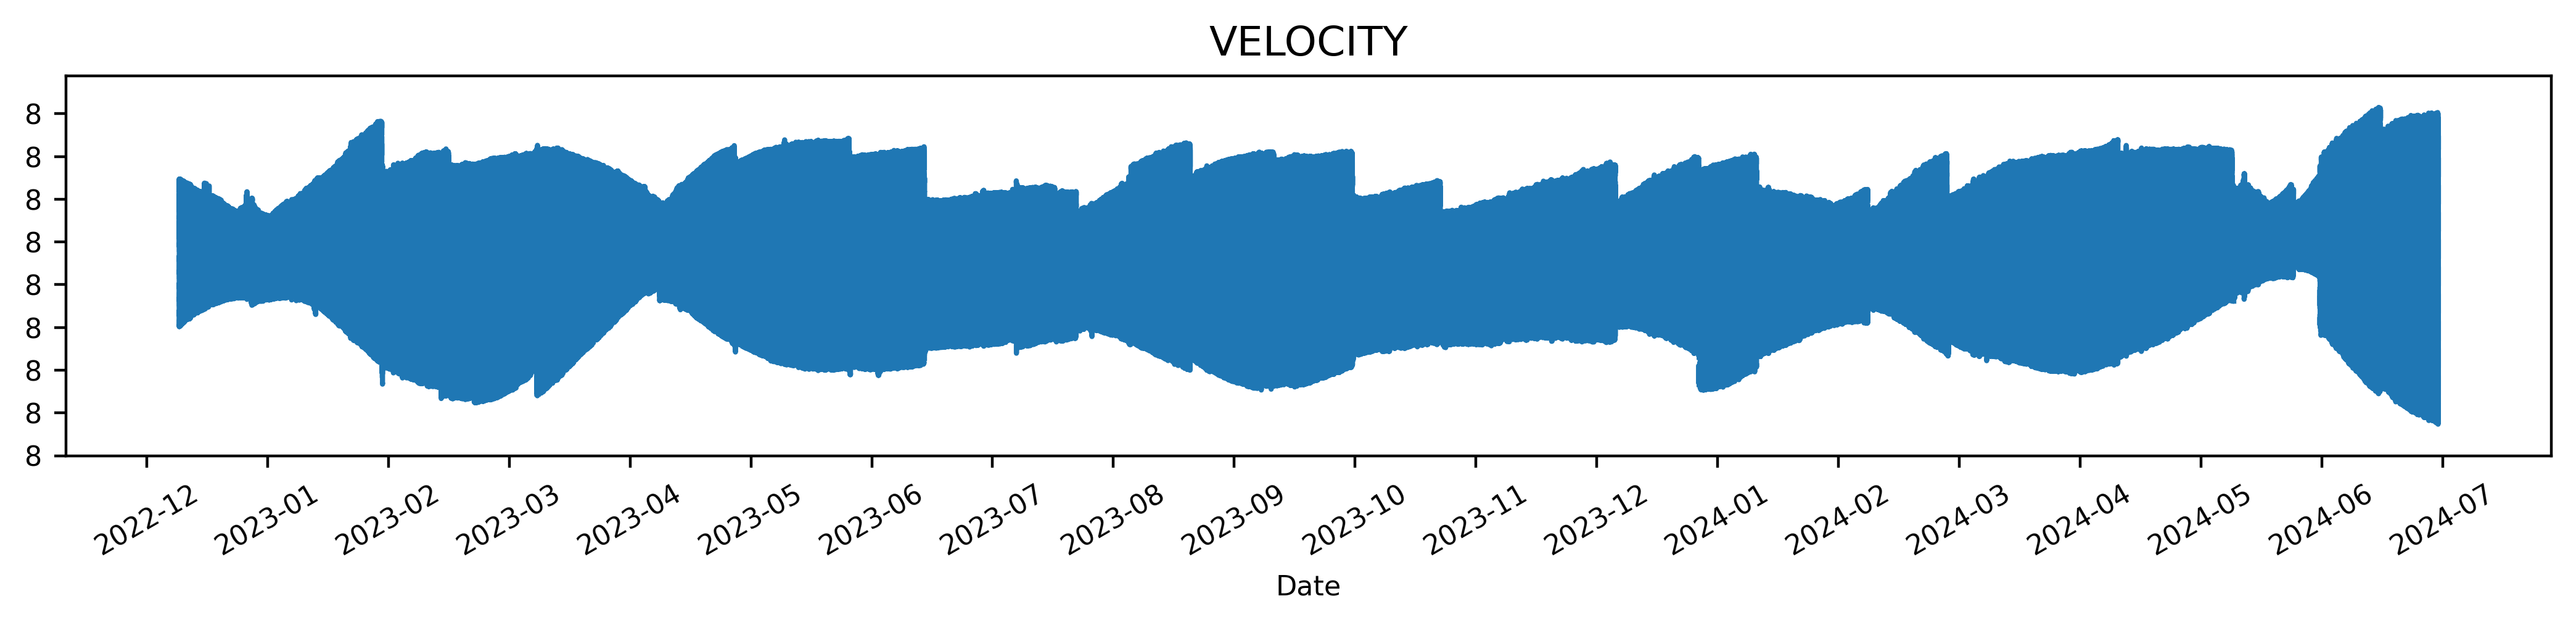

Database\25544.csv


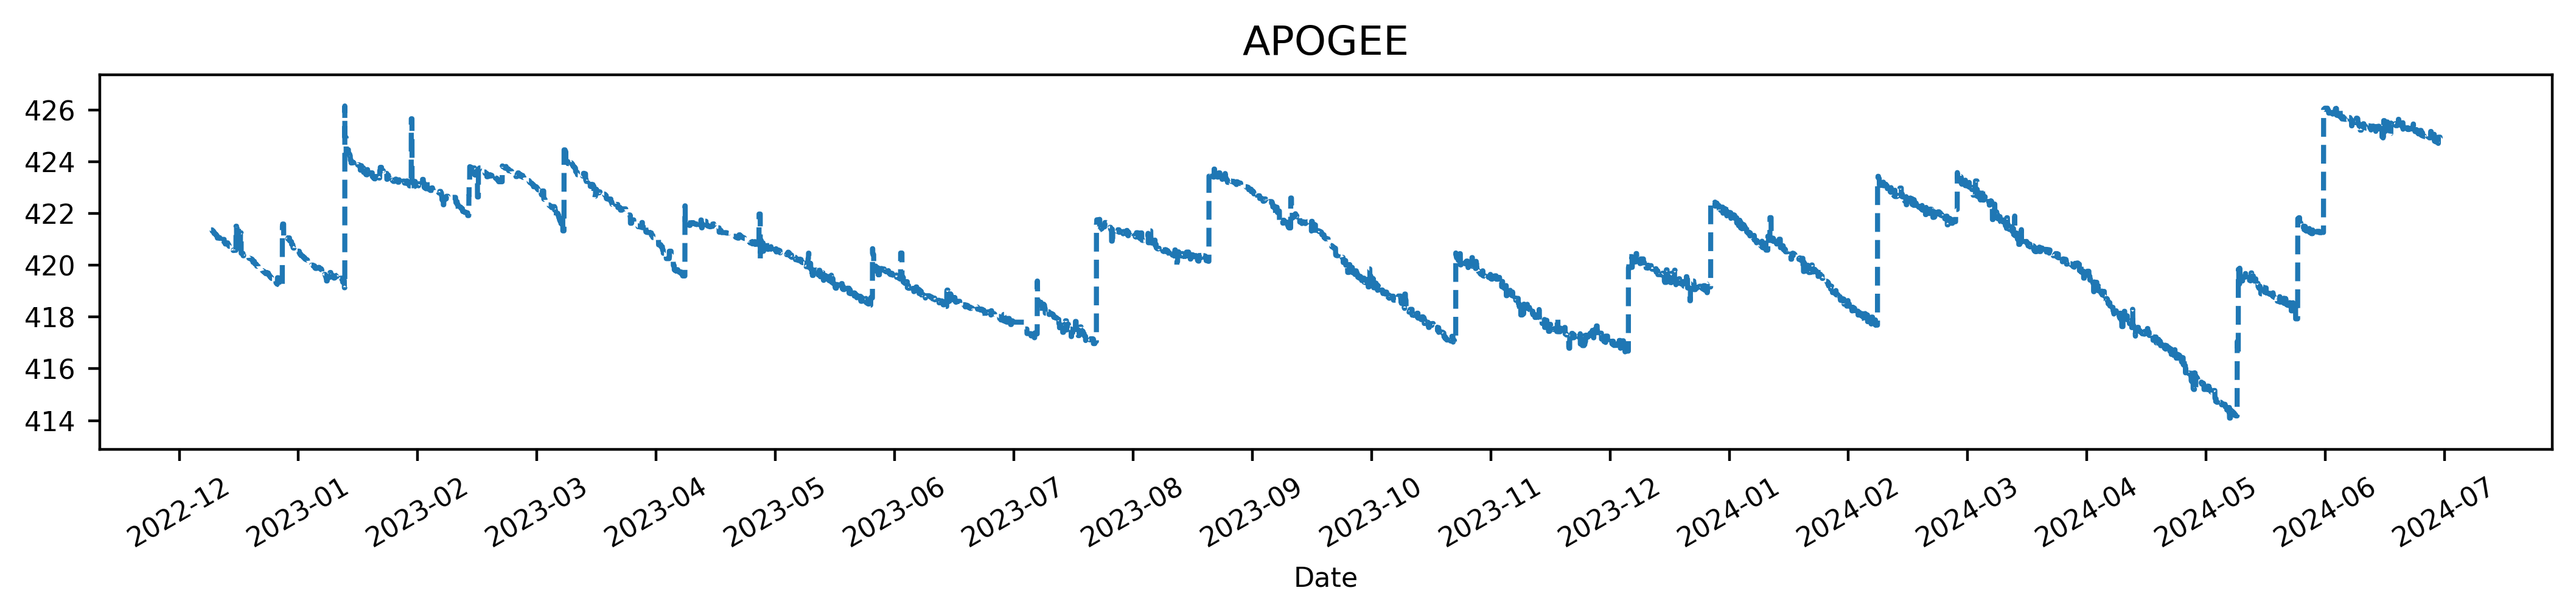

Database\25544.csv


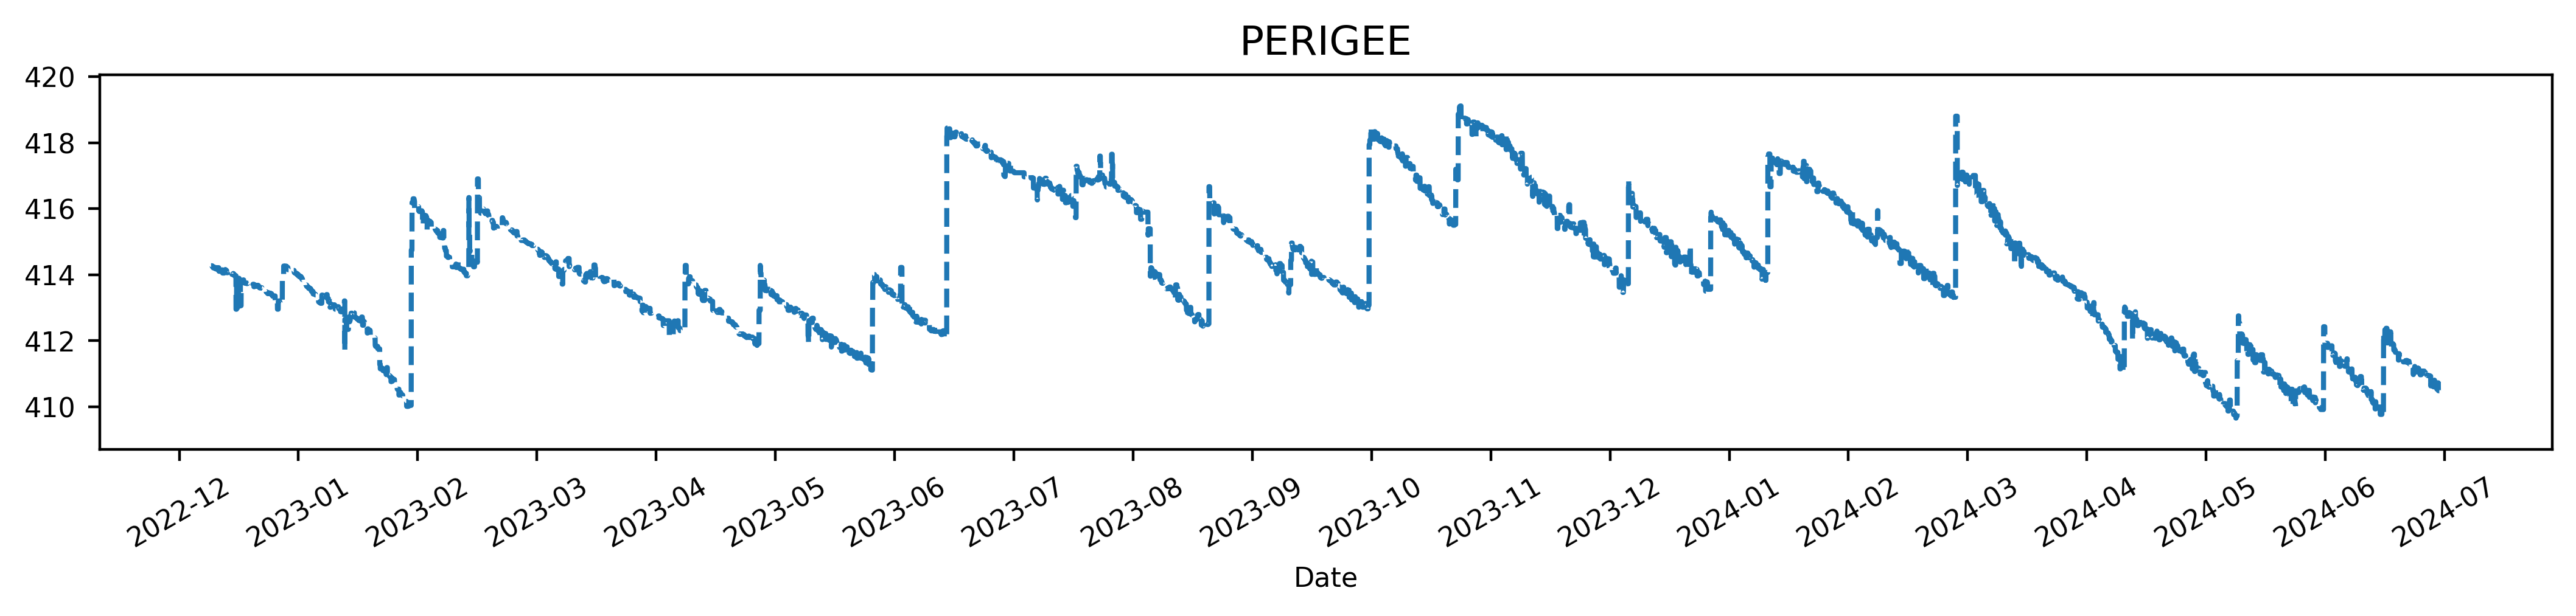

Database\25544.csv


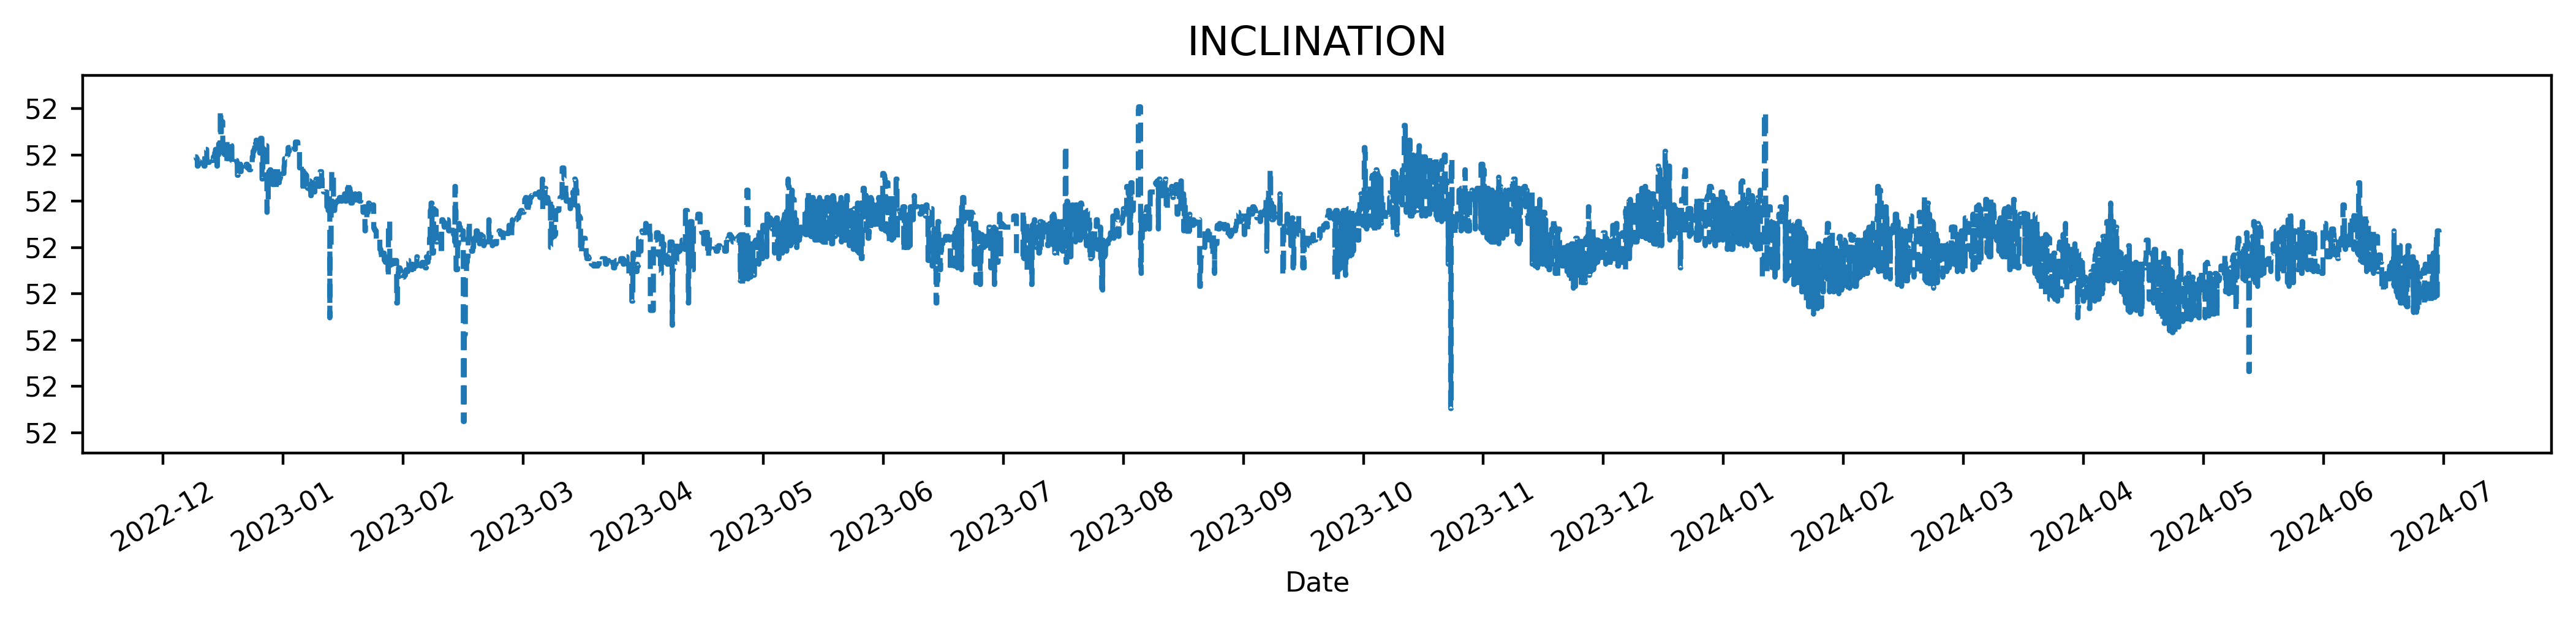

Database\25544.csv



KeyboardInterrupt



In [52]:
# files = sorted(filename for filename in os.listdir(input_dir))
directory = 'Database'
files_lst = glob(f"{directory}/*.csv")
stat_lst = ['altitude', 'velocity', 'apogee', 'perigee',
            'inclination', 'eccentricity', 'raan']

for file in files_lst:
    for stat in stat_lst:
        print(file)
        info_wo_tle_df = pd.read_csv(file, index_col=0)
        name = stat

        df = info_wo_tle_df[['year', 'month', 'day', 'hour', 'minute', name]]

        df_1 = df.copy()
        df_1.loc[:, 'datetime'] = pd.to_datetime(df_1[['year', 'month', 'day', 'hour', 'minute']])
        df_1.set_index('datetime', inplace=True)
        df_1.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)
        df_1 = df_1.resample('5min').mean()

        if name == 'altitude':
            df_1 = df_1 - 6378.137

        draw_graph(df_1, name.upper(), file[9:-4], '',
                   pd.DataFrame(df_1.iloc[[]].index.date).drop_duplicates().values.tolist(), 'tab:blue')